In [30]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])


(60000, 28, 28)
(10000, 28, 28)
60000


In [32]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [34]:
 
model = create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_27 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [35]:

history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.9116 - accuracy: 0.6866 - val_loss: 0.2626 - val_accuracy: 0.9260
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2941 - accuracy: 0.9132 - val_loss: 0.2279 - val_accuracy: 0.9317
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9216 - val_loss: 0.2298 - val_accuracy: 0.9297
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2342 - accuracy: 0.9293 - val_loss: 0.2157 - val_accuracy: 0.9373
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2277 - accuracy: 0.9318 - val_loss: 0.2154 - val_accuracy: 0.9382
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.9313 - val_loss: 0.1950 - val_accuracy: 0.9415
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9362 - val_loss: 0.2069 - val_accuracy: 0.9413
Epoch 

predicted digit: [2]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


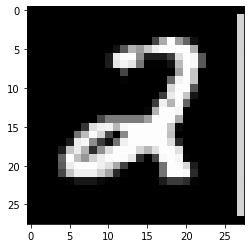

In [36]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))